In [41]:
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt

In [42]:
def gaussian_noise(img, mean=0.1, sigma=0.1):
    """
    添加高斯噪声
    :param img:原图
    :param mean:均值
    :param sigma:标准差 值越大，噪声越多
    :return:噪声处理后的图片
    """
    img = np.asarray(img / 255, dtype=np.float32)  # 图片灰度标准化
    noise = np.random.normal(mean, sigma, img.shape).astype(dtype=np.float32)  # 产生高斯噪声
    output = img + noise  # 将噪声和图片叠加
    output = np.clip(output, 0, 1)
    output = np.uint8(output * 255)
    return output

(-0.5, 5743.5, 3229.5, -0.5)

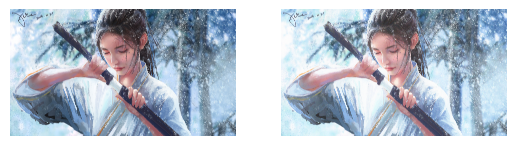

In [43]:
# 1.在图像上加上随机高斯噪声（加法操作），并可视化
img_original = image.imread("./img/SnowGirl.jpg")
img_gaussian = gaussian_noise(img_original)

# 可视化
plt.subplot(1, 2, 1)
plt.imshow(img_original)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_gaussian)
plt.axis('off')

(-0.5, 5743.5, 3229.5, -0.5)

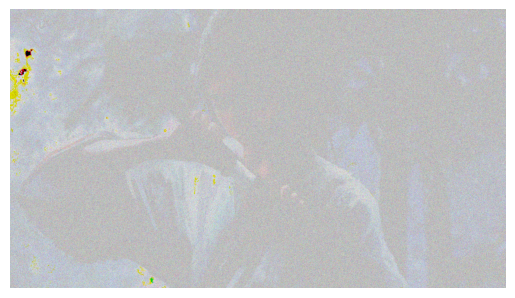

In [44]:
# 2.计算两张图像的差图（减法操作），并可视化
img_diff = abs(img_original - img_gaussian)
plt.imshow(img_diff)
plt.axis('off')

(-0.5, 5743.5, 3229.5, -0.5)

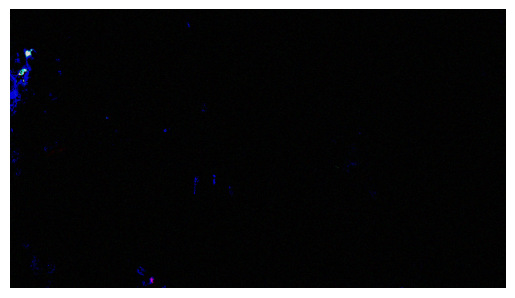

In [51]:
# 3.用不同方法计算两张合成图的并集区域
# 1) 直接判断像素点 RGB 是否相同
img_same = (img_gaussian == img_original) * 255
plt.imshow(img_same)
plt.axis('off')

(-0.5, 5743.5, 3229.5, -0.5)

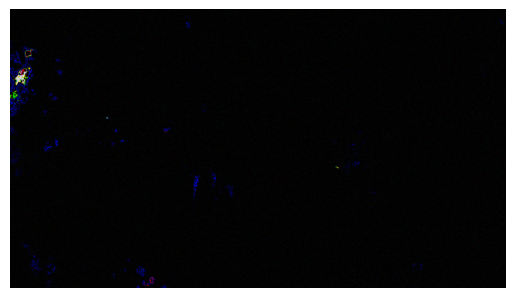

In [56]:
# 2) 从差图入手, 先将不同部分去除(后景), 然后再去展开到 255
plt.imshow(np.array(img_diff / 255, dtype=int) * 255)
plt.axis('off')